<a href="https://colab.research.google.com/github/adamoah/LSTM-Network/blob/main/LSTM_Network_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#import libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler




#RMSE loss function
def root_mean_squared_error(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_true)))


#Set seed so random number generators always generate the same number (for reproducibility of results)
np.random.seed(42)


#Data preparation
Chicago_df = pd.read_csv('Chicago-Network-Data.csv')

x = []
y = []
for i in range(8, 487):
  x.append([Chicago_df.iloc[i, 0], Chicago_df.iloc[i, 1]])
  y.append(Chicago_df.iloc[i, 2])

input_x = np.array(x)
output_y = np.array(y)

scaler = MinMaxScaler(feature_range=(0, 1))
input_x = scaler.fit_transform(input_x)
output_y = output_y.reshape(-1, 1)
output_y = scaler.fit_transform(output_y)

trainX, testX, trainY, testY = train_test_split(input_x, output_y, test_size=0.2, shuffle=False)

trainX = trainX.reshape(len(trainX), 1, trainX.shape[1])
testX = testX.reshape(len(testX), 1, testX.shape[1])


#initialize model
model = Sequential()
model.add(LSTM(4, input_shape=(1, 2), return_sequences=True))
model.add(LSTM(4))
model.add(Dense(1))

model.compile(loss=root_mean_squared_error, optimizer='adam')
print('model is ready to use')

#run model training
history = model.fit(trainX, trainY, batch_size=1, epochs=100, verbose=2, validation_data=(testX, testY))


#print RMSE of the model for train and test
train_loss=model.evaluate(trainX, trainY)
test_loss = model.evaluate(testX, testY)
print('Train Loss: ', train_loss)
print('Test Loss: ', test_loss)

#graph model loss
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_title('Chicago Model Loss')
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax.legend(['train', 'test'], loc='upper right')


#get model predictions for train/test data
trainPredictions = model.predict(trainX)
testPredictions = model.predict(testX)

#invert predictions and observed data to be in original scale
output_y = scaler.inverse_transform(output_y)
trainPredictions = scaler.inverse_transform(trainPredictions)
testPredictions = scaler.inverse_transform(testPredictions)

#shift train predictions to match observed data
trainPredictionsPlot = np.empty_like(output_y)
trainPredictionsPlot[:, :] = np.nan
trainPredictionsPlot[0:len(trainPredictions), :] = trainPredictions

#shift test predictions to match observed data
testPredictionsPlot = np.empty_like(output_y)
testPredictionsPlot[:, :] = np.nan
testPredictionsPlot[len(trainPredictions):len(output_y), :] = testPredictions

#plot predictions
fig2, ax2 = plt.subplots(1, 1, figsize=(9, 8))
ax2.plot(output_y)
ax2.plot(trainPredictionsPlot)
ax2.plot(testPredictionsPlot)
ax2.set_title('Chicago Model Predictions')
ax2.set_ylabel('kg/kg')
ax2.set_xlabel('Months')
ax2.legend(['Observed', 'Train', 'Test'], loc='upper right')

In [12]:
#Set seed so random number generators always generate the same number (for reproducibility of results)
np.random.seed(42)

In [18]:
#import network data into pandas df
Chicago_df = pd.read_csv('Pakistan-Network-Data.csv')

#create arrays for input and output data
x = []
y = []

#import data from dataframe into list
for i in range(8, 487):
  x.append([Chicago_df.iloc[i, 0], Chicago_df.iloc[i, 1]])
  y.append(Chicago_df.iloc[i, 2])

#convert data from python list to numpy array
input_x = np.array(x)
output_y = np.array(y)

#normalize input data to scale 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
input_x = scaler.fit_transform(input_x)

#reshape output to 2D array and then normalize to range 0 to 1
output_y = output_y.reshape(-1, 1)
output_y = scaler.fit_transform(output_y)

#split data into test and train subsets
trainX, testX, trainY, testY = train_test_split(input_x, output_y, test_size=0.2, shuffle=False)

#reshape input data to [samples, time steps. features]
trainX = trainX.reshape(len(trainX), 1, trainX.shape[1])
testX = testX.reshape(len(testX), 1, testX.shape[1])


In [20]:
#initialize model
model = Sequential()
  
#create lstm input and 2 hidden layers
model.add(LSTM(4, input_shape=(1, 2), return_sequences=True))
model.add(LSTM(4))

#create dense output layer
model.add(Dense(1))

#RMSE loss function
def root_mean_squared_error(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_true)))

#compile model
model.compile(loss=root_mean_squared_error, optimizer='adam')
print('model is ready to use')

model is ready to use


In [21]:
#run model training
history = model.fit(trainX, trainY, batch_size=1, epochs=100, verbose=2, validation_data=(testX, testY))

Epoch 1/100
383/383 - 8s - loss: 0.2261 - val_loss: 0.1879 - 8s/epoch - 20ms/step
Epoch 2/100
383/383 - 1s - loss: 0.1986 - val_loss: 0.1919 - 1s/epoch - 4ms/step
Epoch 3/100
383/383 - 2s - loss: 0.1873 - val_loss: 0.1563 - 2s/epoch - 4ms/step
Epoch 4/100
383/383 - 1s - loss: 0.1698 - val_loss: 0.1459 - 1s/epoch - 4ms/step
Epoch 5/100
383/383 - 1s - loss: 0.1579 - val_loss: 0.1643 - 1s/epoch - 3ms/step
Epoch 6/100
383/383 - 1s - loss: 0.1527 - val_loss: 0.1474 - 1s/epoch - 3ms/step
Epoch 7/100
383/383 - 1s - loss: 0.1491 - val_loss: 0.1577 - 1s/epoch - 4ms/step
Epoch 8/100
383/383 - 2s - loss: 0.1469 - val_loss: 0.1298 - 2s/epoch - 5ms/step
Epoch 9/100
383/383 - 2s - loss: 0.1446 - val_loss: 0.1403 - 2s/epoch - 4ms/step
Epoch 10/100
383/383 - 1s - loss: 0.1432 - val_loss: 0.1649 - 1s/epoch - 3ms/step
Epoch 11/100
383/383 - 2s - loss: 0.1418 - val_loss: 0.1354 - 2s/epoch - 4ms/step
Epoch 12/100
383/383 - 2s - loss: 0.1399 - val_loss: 0.1825 - 2s/epoch - 4ms/step
Epoch 13/100
383/383 - 2

3/3 [==============================] - 0s 9ms/step - loss: 0.2081
Train Loss:  0.17128491401672363
Test Loss:  0.20807717740535736


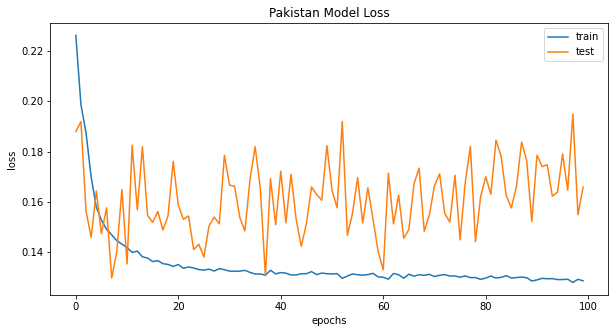

In [22]:
#print RMSE of the model for train and test
train_loss=model.evaluate(trainX, trainY)
test_loss = model.evaluate(testX, testY)
print('Train Loss: ', train_loss)
print('Test Loss: ', test_loss)

#graph model loss
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_title('Chicago Model Loss')
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax.legend(['train', 'test'], loc='upper right')

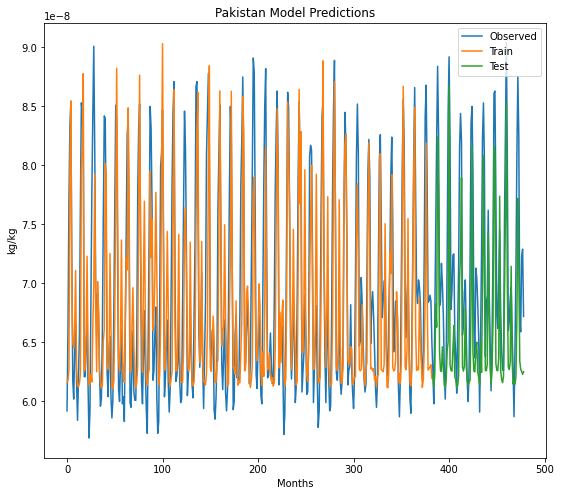

In [23]:
#get model predictions for train/test data
trainPredictions = model.predict(trainX)
testPredictions = model.predict(testX)

#invert predictions and observed data to be in original scale
output_y = scaler.inverse_transform(output_y)
trainPredictions = scaler.inverse_transform(trainPredictions)
testPredictions = scaler.inverse_transform(testPredictions)

#shift train predictions to match observed data
trainPredictionsPlot = np.empty_like(output_y)
trainPredictionsPlot[:, :] = np.nan
trainPredictionsPlot[0:len(trainPredictions), :] = trainPredictions

#shift test predictions to match observed data
testPredictionsPlot = np.empty_like(output_y)
testPredictionsPlot[:, :] = np.nan
testPredictionsPlot[len(trainPredictions):len(output_y), :] = testPredictions

#plot predictions
fig, ax = plt.subplots(1, 1, figsize=(9, 8))
ax.plot(output_y)
ax.plot(trainPredictionsPlot)
ax.plot(testPredictionsPlot)
ax.set_title('Chicago Model Predictions')
ax.set_ylabel('kg/kg')
ax.set_xlabel('Months')
ax.legend(['Observed', 'Train', 'Test'], loc='upper right')

0.28256148331021214